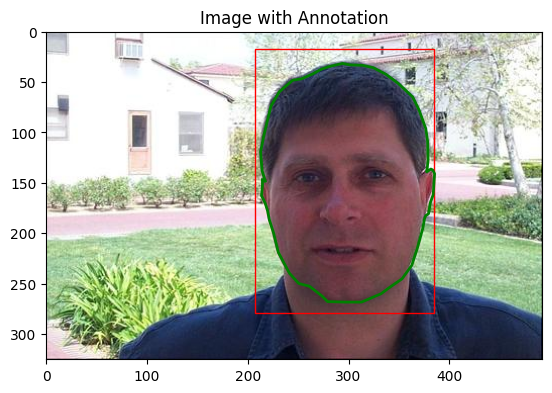

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import scipy.io as sio

# Paths to the MAT file and the image
mat_path = "/home/austinwang/caltech-101/Annotations/Faces_2/annotation_0003.mat"
image_path = "/home/austinwang/caltech-101/101_ObjectCategories/Faces/image_0003.jpg"

# Load the .mat file
mat = sio.loadmat(mat_path)
print(mat)

# Extract the bounding box coordinates and object contour data
box_coord = mat['box_coord'].flatten()
obj_contour = mat['obj_contour']

# Load the image
image = Image.open(image_path)
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch for the bounding box
rect = patches.Rectangle((box_coord[2], box_coord[0]), box_coord[3] - box_coord[2], box_coord[1] - box_coord[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Plot the contour
# Adjusting contour coordinates to fit within the bounding box
x_contour = obj_contour[0, :] + box_coord[2]
y_contour = obj_contour[1, :] + box_coord[0]
ax.plot(x_contour, y_contour, 'g-', linewidth=2)  # Green line for the contour

# Set plot limits and show the plot
ax.set_xlim(0, image.width)
ax.set_ylim(image.height, 0)  # Invert the y-axis to match image coordinates
plt.title('Image with Annotation')
plt.show()
